# Data Science Internship @ LetsGrowMore

LGMVIP - Jan 2022

By Revathy K D S

Task 1 : Iris flower classification ML project

Level : Beginner Task

Language : Python

IDE : Jupyter Notebook 

## Importing the required libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

### Read the dataset

In [2]:
iris = pd.read_csv("iris.csv")
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [4]:
iris.shape

(150, 6)

There are 150 rows and 6 columns

In [5]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


Here they have 4 numeric columns and 1 categorical column

In [6]:
iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Clearly there are no missing values.

## Data Visualization

<AxesSubplot:xlabel='SepalLengthCm'>

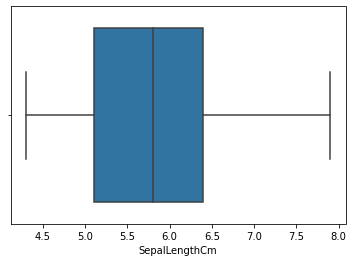

In [7]:
# Box plots for Numerical columns
sns.boxplot(iris.SepalLengthCm)

<AxesSubplot:xlabel='SepalWidthCm'>

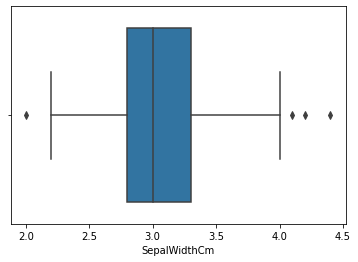

In [8]:
sns.boxplot(iris.SepalWidthCm)


<AxesSubplot:xlabel='PetalLengthCm'>

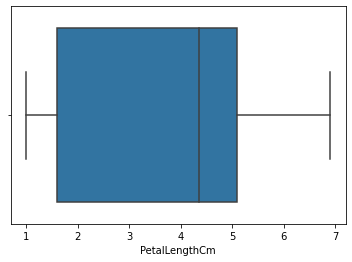

In [9]:
sns.boxplot(iris.PetalLengthCm)

<AxesSubplot:xlabel='PetalWidthCm'>

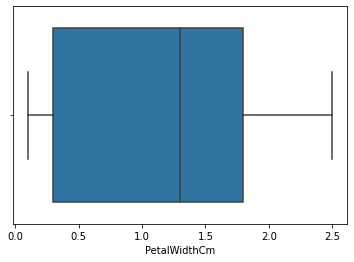

In [10]:
sns.boxplot(iris.PetalWidthCm)

<AxesSubplot:ylabel='Species'>

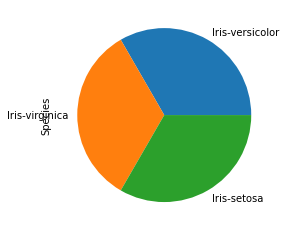

In [11]:
# categorical variable
iris.Species.value_counts().plot.pie()

<AxesSubplot:>

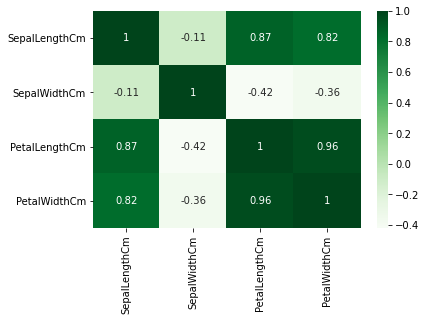

In [12]:
sns.heatmap(iris[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].corr(), annot=True, cmap ="Greens")

so, `PetalLengthCm`, `PetalWidthCm` and 
`SepalLengthCm` , `PetalLengthCm` and   
`SepalLengthCm` , `PetalWidthCm` are highly correlated.


## KNN 

In [13]:
X = iris.drop(['Id', 'Species'], axis=1)
y = iris['Species']
print(X.head())
print(y.head())

   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0            5.1           3.5            1.4           0.2
1            4.9           3.0            1.4           0.2
2            4.7           3.2            1.3           0.2
3            4.6           3.1            1.5           0.2
4            5.0           3.6            1.4           0.2
0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object


In [14]:
print(X.shape)
print(y.shape)

(150, 4)
(150,)


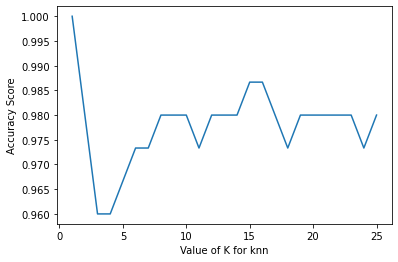

In [15]:
# experimenting with different n values
k_range = list(range(1,26))
score=[]
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X, y)
    y_pred = knn.predict(X)
    score.append(metrics.accuracy_score(y, y_pred))

plt.plot(k_range, score)
plt.xlabel('Value of K for knn')
plt.ylabel('Accuracy Score')
plt.show()

We can see that as k is increasing accuracy is getting good score